In [56]:
import sklearn.externals
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Continuous Peaks Problem

In [638]:
length = 50
fitness_cp = mlrose.ContinuousPeaks()

In [639]:
problem_cp = mlrose.DiscreteOpt(length =length, fitness_fn = fitness_cp, maximize = True, max_val = 2)

In [619]:
schedule = mlrose.ExpDecay()
CP_SA = mlrose.simulated_annealing(problem_cp,schedule = schedule, max_attempts = 100, max_iters = 2000, random_state = 1, curve=True)

In [609]:
CP_RHC = mlrose.random_hill_climb(problem_cp, max_attempts = 30, restarts=10, max_iters = 2000, random_state = 1, curve=True)

In [610]:
CP_GA = mlrose.genetic_alg(problem_cp, max_attempts = 30, max_iters = 500, random_state = 1, curve=True)

In [611]:
CP_MIMIC = mlrose.mimic(problem_cp, max_attempts = 30, max_iters = 500, random_state = 1, curve=True)

In [620]:
CP_SA_Curve = np.transpose(CP_SA[2])[0]
CP_GA_Curve = np.transpose(CP_GA[2])[0]
CP_RHC_Curve = np.transpose(CP_RHC[2])[0]
CP_MIMIC_Curve = np.transpose(CP_MIMIC[2])[0]

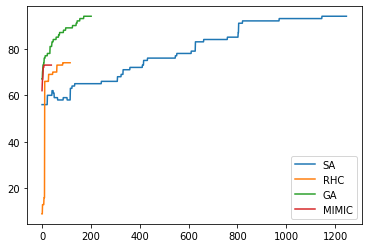

In [621]:
plt.plot(CP_SA_Curve, label = 'SA')
plt.plot(CP_RHC_Curve, label = 'RHC')
plt.plot(CP_GA_Curve, label = 'GA')
plt.plot(CP_MIMIC_Curve,label = 'MIMIC')
plt.legend(loc = 0)
plt.show()

In [656]:
CP_GA_Curves=[]
for population in [0.1,0.3,0.5,0.7,0.9]:
    CP_GA = mlrose.genetic_alg(problem_cp, mutation_prob = population,max_attempts = 50, max_iters = 500, random_state = 1, curve=True)
    CP_GA_Curve = np.transpose(CP_GA[2])[0]
    CP_GA_Curves.append(CP_GA_Curve)

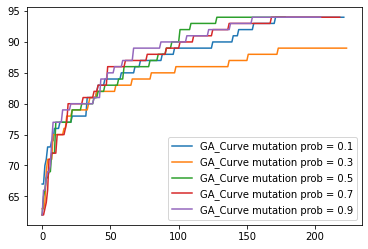

In [658]:
plt.plot(CP_GA_Curves[0], label = 'GA_Curve mutation prob = 0.1')
plt.plot(CP_GA_Curves[1], label = 'GA_Curve mutation prob = 0.3')
plt.plot(CP_GA_Curves[2], label = 'GA_Curve mutation prob = 0.5')
plt.plot(CP_GA_Curves[3], label = 'GA_Curve mutation prob = 0.7')
plt.plot(CP_GA_Curves[4], label = 'GA_Curve mutation prob = 0.9')
plt.legend(loc = 0)
plt.show()

In [659]:
CP_GA_Curves=[]
for population in [50,100,150,200]:
    CP_GA = mlrose.genetic_alg(problem_cp, pop_size = population,max_attempts = 50, max_iters = 500, random_state = 1, curve=True)
    CP_GA_Curve = np.transpose(CP_GA[2])[0]
    CP_GA_Curves.append(CP_GA_Curve)

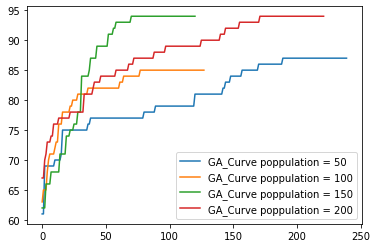

In [660]:
plt.plot(CP_GA_Curves[0], label = 'GA_Curve poppulation = 50')
plt.plot(CP_GA_Curves[1], label = 'GA_Curve poppulation = 100')
plt.plot(CP_GA_Curves[2], label = 'GA_Curve poppulation = 150')
plt.plot(CP_GA_Curves[3], label = 'GA_Curve poppulation = 200')
plt.legend(loc = 0)
plt.show()

# Travelling Salesperson Problem

In [230]:
num_city = 30
x = list(range(num_city))
y = list(range(num_city))
np.random.shuffle(x)
np.random.shuffle(y)
city = []
for i in range(num_city):
    city.append((x[i],y[i]))
city

[(17, 2),
 (8, 6),
 (22, 5),
 (2, 4),
 (10, 29),
 (27, 17),
 (13, 20),
 (16, 28),
 (20, 9),
 (9, 15),
 (28, 19),
 (7, 16),
 (19, 25),
 (14, 10),
 (29, 13),
 (23, 1),
 (25, 14),
 (0, 24),
 (4, 21),
 (11, 23),
 (21, 18),
 (18, 22),
 (6, 8),
 (26, 7),
 (24, 12),
 (1, 3),
 (5, 11),
 (15, 26),
 (3, 0),
 (12, 27)]

In [231]:
fitness_tsp = mlrose.TravellingSales(coords = city)

In [232]:
problem_tsp = mlrose.TSPOpt(length = num_city, fitness_fn = fitness_tsp, maximize=False)

In [233]:
TSP_SA = mlrose.simulated_annealing(problem_tsp, max_attempts = 50, max_iters = 500, random_state = 1, curve=True)

In [234]:
TSP_GA = mlrose.genetic_alg(problem_tsp, random_state = 1,max_attempts = 50, max_iters = 150, curve=True)

In [235]:
TSP_RHC = mlrose.random_hill_climb(problem_tsp, max_attempts = 50, restarts=5, max_iters = 500, random_state = 1, curve=True)

In [236]:
TSP_MIMIC = mlrose.mimic(problem_tsp, max_attempts = 50, max_iters = 500, random_state = 1, curve=True)

In [237]:
TSP_SA_Curve = np.transpose(TSP_SA[2])[0]
TSP_GA_Curve = np.transpose(TSP_GA[2])[0]
TSP_RHC_Curve = np.transpose(TSP_RHC[2])[0]
TSP_MIMIC_Curve = np.transpose(TSP_MIMIC[2])[0]

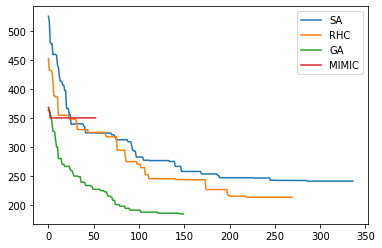

In [238]:
plt.plot(TSP_SA_Curve, label = 'SA')
plt.plot(TSP_RHC_Curve, label = 'RHC')
plt.plot(TSP_GA_Curve, label = 'GA')
plt.plot(TSP_MIMIC_Curve,label = 'MIMIC')
plt.legend(loc = 0)
plt.show()

# Knapsack Problem

In [494]:
num_items = 50
weights = np.random.randint(low = 1, high = 15,size = num_items)
value = np.random.randint(low = 1, high = 15,size = num_items)
max_weight_pct = 0.3

In [495]:
weights

array([10, 13, 10, 14,  7,  8,  7,  9, 10,  2,  5,  4,  1,  7,  6,  6,  6,
       11, 12, 11,  9,  6,  1,  8, 10,  5, 11, 12,  7, 14, 10,  3,  1, 12,
        1, 14,  6, 13,  1,  2,  7,  7,  8,  9,  4, 13,  3,  9, 14, 10])

In [496]:
value

array([ 2,  7,  8,  3, 13, 14, 10, 10,  3, 10, 14,  9,  4, 13,  9,  1,  6,
        6, 13, 14, 10, 13,  8,  8, 11,  1,  7,  3, 14, 13,  3, 12,  1, 11,
        2, 10,  6, 10,  2, 13,  9, 10,  7, 14, 14,  2,  7,  5,  1,  1])

In [497]:
fitness_KSP = mlrose.Knapsack(weights,value,max_weight_pct)

In [498]:
problem_KSP = mlrose.KnapsackOpt(length = num_items, fitness_fn = fitness_KSP, maximize = True)

In [518]:
KSP_SA = mlrose.simulated_annealing(problem_KSP, max_attempts = 30, max_iters = 2000, random_state = 1, curve=True)

In [523]:
KSP_GA = mlrose.genetic_alg(problem_KSP, random_state = 1,max_attempts = 30, max_iters = 500, curve=True)

In [520]:
KSP_RHC = mlrose.random_hill_climb(problem_KSP, max_attempts = 30, restarts=10, max_iters = 500, random_state = 1, curve=True)

In [526]:
KSP_MIMIC = mlrose.mimic(problem_KSP, max_attempts = 30, max_iters = 500, random_state = 1, curve=True)

In [527]:
KSP_SA_Curve = np.transpose(KSP_SA[2])[0]
KSP_GA_Curve = np.transpose(KSP_GA[2])[0]
KSP_RHC_Curve = np.transpose(KSP_RHC[2])[0]
KSP_MIMIC_Curve = np.transpose(KSP_MIMIC[2])[0]

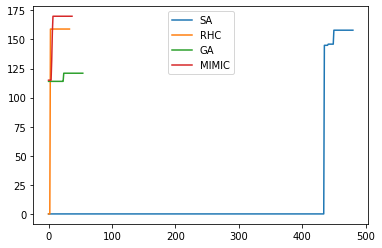

In [528]:
plt.plot(KSP_SA_Curve, label = 'SA')
plt.plot(KSP_RHC_Curve, label = 'RHC')
plt.plot(KSP_GA_Curve, label = 'GA')
plt.plot(KSP_MIMIC_Curve,label = 'MIMIC')
plt.legend(loc = 0)
plt.show()

# Neural Network

In [666]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [667]:
data = load_wine()
X = data.data
Y = data.target

In [668]:
def NN_OPT(hidden_nodes, algorithm, test_size, X, Y):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)

    # Normalize feature data
    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # One hot encode target values
    one_hot = OneHotEncoder()

    y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
    y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
    
    nn_OPT = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = 'relu', \
                                 algorithm = algorithm, max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.00001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
    
    nn_OPT.fit(X_train_scaled, y_train_hot)
    
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_OPT.predict(X_train_scaled)

    y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_OPT.predict(X_test_scaled)

    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    
    return (y_train_accuracy,y_test_accuracy)
    

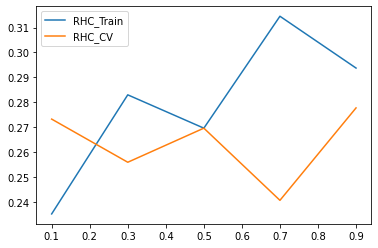

In [669]:
RHC_train_curve = []
RHC_test_curve = []
for i in np.linspace(.1, 0.9, 5):
    RHC_train, RHC_test = NN_OPT([10],'random_hill_climb',1-i, X, Y)
    RHC_train_curve.append(RHC_train)
    RHC_test_curve.append(RHC_test)
plt.plot(np.linspace(.1, 0.9, 5),RHC_train_curve, label = 'RHC_Train')
plt.plot(np.linspace(.1, 0.9, 5),RHC_test_curve, label = 'RHC_CV')
plt.legend(loc = 0)
plt.show()

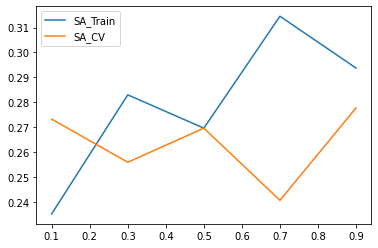

In [670]:
SA_train_curve = []
SA_test_curve = []
for i in np.linspace(.1, 0.9, 5):
    SA_train, SA_test = NN_OPT([10],'simulated_annealing',1-i, X, Y)
    SA_train_curve.append(SA_train)
    SA_test_curve.append(SA_test)
plt.plot(np.linspace(.1, 0.9, 5),SA_train_curve, label = 'SA_Train')
plt.plot(np.linspace(.1, 0.9, 5),SA_test_curve, label = 'SA_CV')
plt.legend(loc = 0)
plt.show()

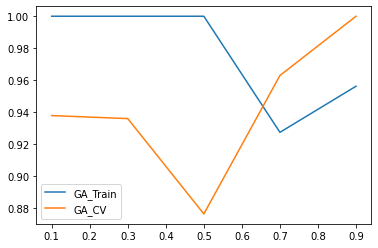

In [671]:
GA_train_curve = []
GA_test_curve = []
for i in np.linspace(.1, 0.9, 5):
    GA_train, GA_test = NN_OPT([10],'genetic_alg',1-i, X, Y)
    GA_train_curve.append(GA_train)
    GA_test_curve.append(GA_test)
plt.plot(np.linspace(.1, 0.9, 5),GA_train_curve, label = 'GA_Train')
plt.plot(np.linspace(.1, 0.9, 5),GA_test_curve, label = 'GA_CV')
plt.legend(loc = 0)
plt.show()

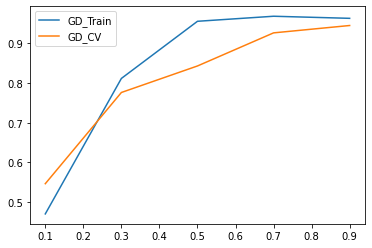

In [672]:
GD_train_curve = []
GD_test_curve = []
for i in np.linspace(.1, 0.9, 5):
    GD_train, GD_test = NN_OPT([10],'gradient_descent',1-i, X, Y)
    GD_train_curve.append(GD_train)
    GD_test_curve.append(GD_test)
plt.plot(np.linspace(.1, 0.9, 5),GD_train_curve, label = 'GD_Train')
plt.plot(np.linspace(.1, 0.9, 5),GD_test_curve, label = 'GD_CV')
plt.legend(loc = 0)
plt.show()